## Set the Scene
The process of diagnosing heart disease can be time sensitive. This work intends to highlight the predictive power of variables based on time constraints. This will put more emphasis on the performance of precision over recall. To discuss the time constraints that may be subject in this analysis, we will look throught the metrics and data we are provided for each patient and construct a basic timeline of events. Since we do not have access to an expert, the following information is based on research and assumptions and should be verified by an expert.

There are 4 main categories of information extraction and collection which will be relevant here: 

- Questionnaire: Face-to-face or over the phone questioning.
- Expert Evaluation: Evaluation by an expert
- Medical Evaluation: Evaluation using medical tools
- Historical: We may be able to rely on information that is recorded in the patients files, but this may be out of date.

| Column    |      Data Collection Method (Apparatus/ Procedure)     |   Estimated Time Taken   |
| --------- | ------------------------------------------------------ | ------------------------ |
| age       | Questionnaire/ Historical                              | 1m                       |
| sex       | Questionnaire/ Historical                              | 1m                       |
| cp        | Expert Evaluation                                      | 5m                       |
| restbp    | Medical Evaluation (Sphygmomanometer)                  | 5m                       |
| chol      | Medical Evaluation (Blood test)                        | 10m                      |
| fbs       | Medical Evaluation (Blood test)                        | 8-10hrs (minimum)        |
| restecg   | Medical Evaluation (electrocardiogram (ECG)            | 10m                      |
| thalach   | Questionnaire/ Historical                              | 1m                       |
| exang     | Medical Evaluation (Treadmill electrocardiogram (ECG)) | 12hrs                    |
| oldpeak   | Medical Evaluation (Treadmill electrocardiogram (ECG)) | 12hrs                    |
| slope     | Medical Evaluation (Treadmill electrocardiogram (ECG)) | 12hrs                    |
| ca        | Medical Evaluation (Flouroscopy)                       | 10m - 2hrs               |
| thal      | Medical Evaluation (Blood test)                        | 10m                      |

*The references that we use to collect information are normally informative websites as they take us through the process for diagnosis and preparation.*

## Preprocessing
Observations:

| Train: 212 | Test: 54 | Validation: 31 | Missing: 6 | Total: 303 |
| ---------- | -------- | -------------- | ---------- | ---------- | 

### Missing Values
It is advised in the description of the data that missing values are identified as (-9) from further reading into dataset. However, when we performed EDA on this dataset, while we don't come across any missing values identified by (-9), we do come across several values labelled with a question mark (?). In smaller datasets we want to keep the most observations that we can however with that comes the issue of imputing values that aren't representative of the population. In smaller sets of data, unique occurences of variable combinations are more likely to occur. Therefore, if we were to impute the values based on those surrounding them, we could be artificially manipulating the outcome. Therefore we have just removed these missing values.

### Feature Engineering
Additionally, there were features of the dataset that could be transformed to produce a more generalised model.

In particular, our target variable was initially divided into 5 values, (0,1,2,3,4) of which 0 represented an absense of heart disease and anything other value represented a presence of heart disease, therefore we could convert this feature in a binary feature.

We need to convert categorical data into encoded values. There are numerous ways to encode a categorical value but each of these has its' disadvantage:

- One-hot encoding - Curse of dimensionality
- Integer Encoding - Assumes Ordinal Relationship

Therefore, if we can take advantage of an ordinal relationship that exists in the data, we use integer encoding, otherwise we use one-hot encoding. The only variable that can remain encoded via integer encoding is 'ca' which refers to the number of major vessels, an ordinal relationship. All other categorical columns will be encoded using one-hot encoding.
Additionally the following changes were made to features of the dataset:

- Thalassemia: Occurence of Thalassemia was converted to a binary feature of 0: absense and 1:presence
- Chest Pain Type: Occurence of Chest Pain Type was converted to a binary feature of 0:absense and 1:presence
- RestECG: Resting ECG was converted to binary feature of 0:absense and 1:presence
- Slope: Applied one-hot encoding to seperate categorical features
- Number of Major Vessels: Applied one-hot encoding to seperate categorical features  

## Overview of Model

Given smaller occurences of values in some features, overfitting was likely to occur. During the feature engineering process we transformed some of our features to generalise the model and in doing so reduce the variance.
To perform the prediction of heart disease, we used a Logisitic Regression model. Logisitic regression remains a firm favourite for outlining the predictive power of a given dataset when criteria requirements are met. The current dataset does not contain more features than observations and our classification problem is based on discrete, binary values. Logisitic regression is fast, simple and makes no assumptions about the data distribution and does not require standardization. We are able to extract the weights of a given logistic regression model and not only can we see its' importaance but we can also see the directional association of that feature. Additionally, logistic regression is less likely to overfit the data.

While producing the model, the parameters for Logisitic Regression were tweaked but the only parameter that made an improvement on our results was the inverse regularization parameter (C). By reducing this parameter to 0.5, we were able to yeild better results.


## Results

During this analysis, we wanted to concentrate on the quickest turn-around of a prediction. In order to do this, we segmented our features by time (minutes) taken to perform:

|  Features  |    <60   |    <120    |    <600    |    <720    |
| ---------- | -------- | ---------- | ---------- | ---------- | 
|    age     |     X    |      X     |      X     |      X     |
|    sex     |     X    |      X     |      X     |      X     |
|    cp      |     X    |      X     |      X     |      X     |
|    restbp  |     X    |      X     |      X     |      X     |
|    chol    |     X    |      X     |      X     |      X     |
|    restecg |     X    |      X     |      X     |      X     |
|    thalach |     X    |      X     |      X     |      X     |
|    thal    |     X    |      X     |      X     |      X     |
|    ca      |          |      X     |      X     |      X     |
|    fbs     |          |            |      X     |      X     |
|    exang   |          |            |            |      X     |
|    oldpeak |          |            |            |      X     |
|    slope   |          |            |            |      X     |

The following results provide the validation metrics for these predictions. As can be seen from these results, while we have not acheived high predictive power, we have shown that we can acheive the same predictive power within just 2 hours using less diagnostic tests.


|  Time Limits  | Precision  |  Recall  |   F1   |
| ------------- | ---------- | -------- | ------ |
| <60           |                                |
|   absence     |     78%    |    82%   |   80%  |
|   presence    |     77%    |    71%   |   74%  |
| <120          |                                |
|   absence     |     83%    |    88%   |   86%  |
|   presence    |     85%    |    79%   |   81%  |
| <600          |                                |
|   absence     |     83%    |    88%   |   86%  |
|   presence    |     85%    |    79%   |   81%  |
| <720          |                                |
|   absence     |     83%    |    88%   |   86%  |
|   presence    |     85%    |    79%   |   81%  |

The features that consistently showed more association were; Chest Pain Type (Binary), Thallassemia (Binary) and the Number of Major arteries (Categorical:- One-hot encoding) particularly in cases where patients have 0 or 2 Major Vessels.

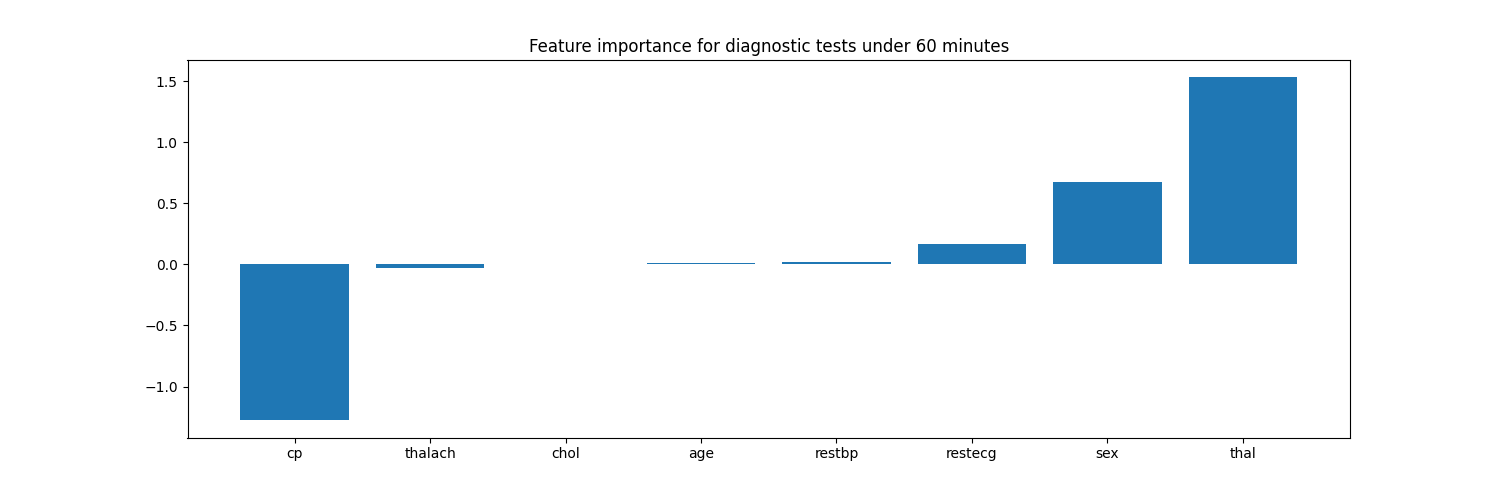

In [10]:
from IPython.display import Image
Image("feature_importance_<60.png")

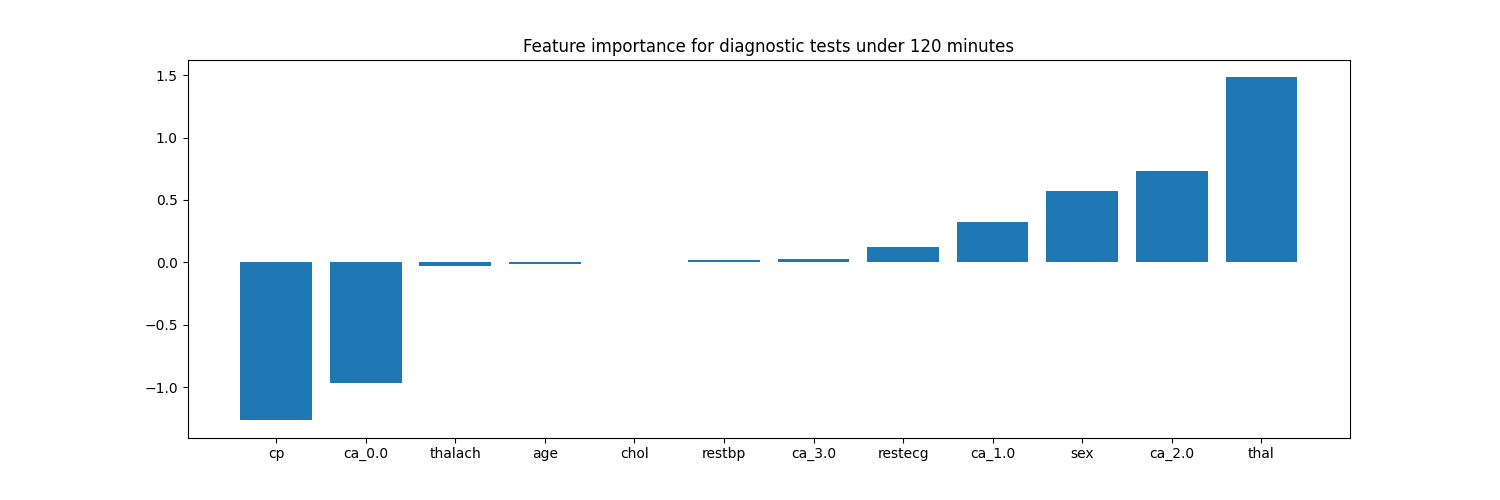

In [7]:
Image("feature_importance_<120.png")

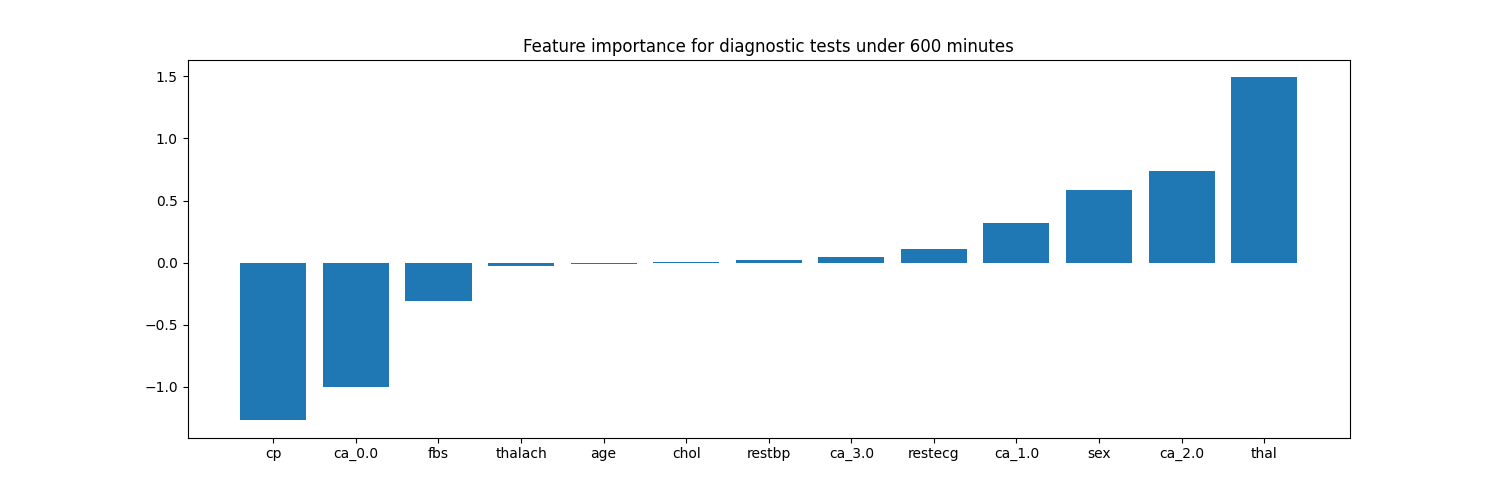

In [8]:
Image("feature_importance_<600.png")

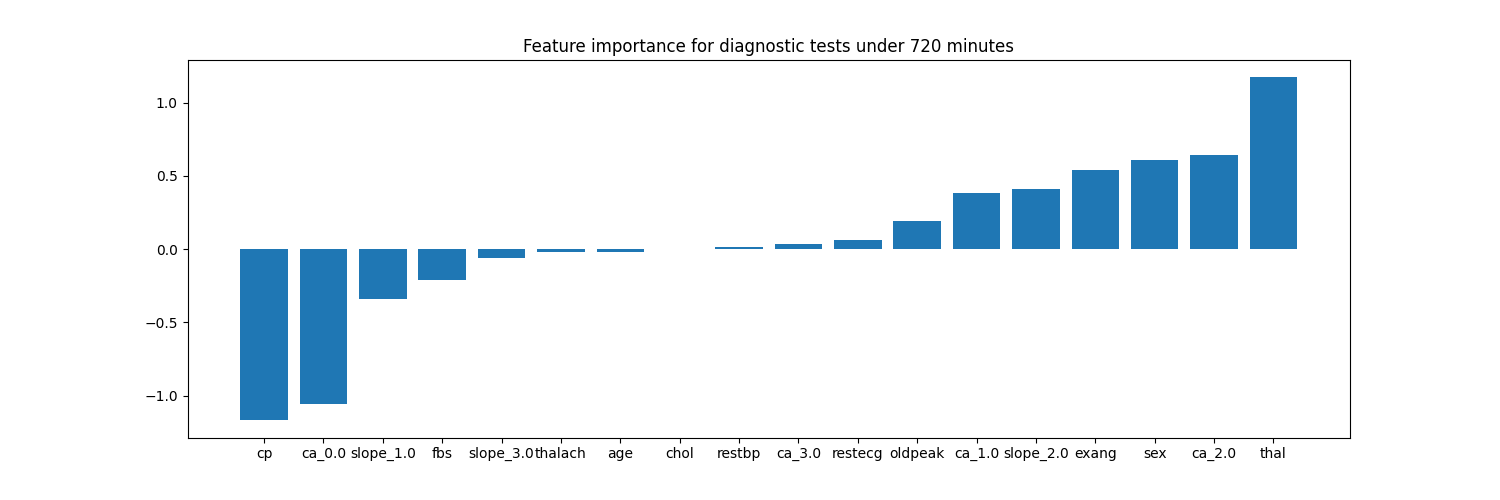

In [9]:
Image("feature_importance_<720.png")